## Homework 5

* Solve ordinary differential equations


#### Problem #1a, #1b, and #1c (next cell)
Solution in Python for comparison to Excel solution.

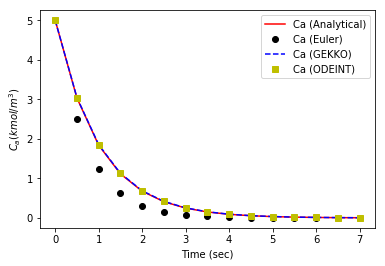

In [7]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# install Gekko, if needed
try:
    from gekko import GEKKO
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','gekko'])
    from gekko import GEKKO

# number of time points
n = 15
# final time
tf = 7.0
# initial concentration
Ca0 = 5.0
# constants
k = 1 # 1/s

# method #1 Analytical solution
# Ca(t) = Ca(0) * exp(-k*t)
t = np.linspace(0,tf,n)
Ca_m1 = Ca0 * np.exp(-k*t)

# method #2 Euler's method
Ca_m2 = np.empty(n)
Ca_m2[0] = Ca0 # kmol/m^3
for i in range(1,n):
    dt = t[i] - t[i-1]
    Ca_m2[i] = Ca_m2[i-1] - k * Ca_m2[i-1] * dt

# method #3: GEKKO solution
# create new gekko model
m = GEKKO()
# integration time points
m.time = t
# variables
Ca = m.Var(value=Ca0)
# differential equation
m.Equation(Ca.dt()==-k*Ca)
# set options
m.options.IMODE = 4 # dynamic simulation
m.options.NODES = 3 # collocation nodes
# simulate ODE
m.solve(disp=False)

# method #4: ODEINT from SciPy
def dCadt(t,Ca):
    return -k * Ca
Ca_m4 = odeint(dCadt,t,Ca0)

# plot results
plt.figure(1)
plt.plot(t,Ca_m1,'r-',label='Ca (Analytical)')
plt.plot(t,Ca_m2,'ko',label='Ca (Euler)')
plt.plot(t,Ca,'b--',label='Ca (GEKKO)')
plt.plot(t,Ca,'ys',label='Ca (ODEINT)')
plt.xlabel('Time (sec)')
plt.ylabel(r'$C_a (kmol/m^3)$')
plt.legend(loc='best')
plt.show() 

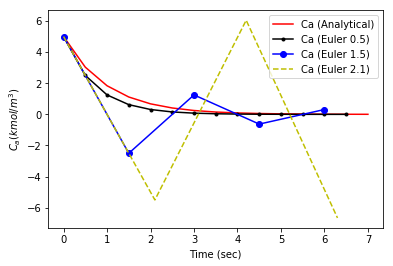

In [4]:
# problem 1c
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from gekko import GEKKO
from scipy.integrate import odeint

# number of time points
n = 15
# final time
tf = 7.0
# initial concentration
Ca0 = 5.0
# constants
k = 1 # 1/s

# method #1 Analytical solution
# Ca(t) = Ca(0) * exp(-k*t)
t = np.linspace(0,tf,n)
Ca_m1 = Ca0 * np.exp(-k*t)

# method #2 Euler's method
t2 = np.arange(0,tf,0.5)
n = len(t2)
Ca_m2 = np.empty_like(t2)
Ca_m2[0] = Ca0 # kmol/m^3
for i in range(1,n):
    dt = t2[i] - t2[i-1]
    Ca_m2[i] = Ca_m2[i-1] - k * Ca_m2[i-1] * dt

t3 = np.arange(0,tf,1.5)
n = len(t3)
Ca_m3 = np.empty_like(t3)
Ca_m3[0] = Ca0 # kmol/m^3
for i in range(1,n):
    dt = t3[i] - t3[i-1]
    Ca_m3[i] = Ca_m3[i-1] - k * Ca_m3[i-1] * dt

t4 = np.arange(0,tf,2.1)
n = len(t4)
Ca_m4 = np.empty_like(t4)
Ca_m4[0] = Ca0 # kmol/m^3
for i in range(1,n):
    dt = t4[i] - t4[i-1]
    Ca_m4[i] = Ca_m4[i-1] - k * Ca_m4[i-1] * dt

# plot results
plt.figure(1)
plt.plot(t,Ca_m1,'r-',label='Ca (Analytical)')
plt.plot(t2,Ca_m2,'k.-',label='Ca (Euler 0.5)')
plt.plot(t3,Ca_m3,'bo-',label='Ca (Euler 1.5)')
plt.plot(t4,Ca_m4,'y--',label='Ca (Euler 2.1)')
plt.xlabel('Time (sec)')
plt.ylabel(r'$C_a (kmol/m^3)$')
plt.legend(loc='best')
plt.show()

#### Problem #2
Solution in Python for comparison to Excel solution.

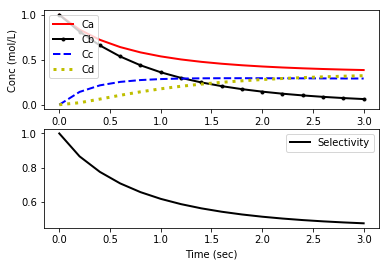

In [6]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from gekko import GEKKO

# final time
tf = 3.0

# constants
k1 = 1.0 # L/mol-s
k2 = 1.5 # L/mol-s

# GEKKO solution
# create new gekko model
m = GEKKO()
# integration time points
m.time = np.arange(0,tf+0.01,0.2)
# variables
Ca = m.Var(value=1.0)
Cb = m.Var(value=1.0)
Cc = m.Var(value=0.0)
Cd = m.Var(value=0.0)
S = m.Var(value=1.0)
# differential equations
m.Equation(Ca.dt()==-k1*Ca*Cb)
m.Equation(Cb.dt()==-k1*Ca*Cb-k2*Cb*Cc)
m.Equation(Cc.dt()== k1*Ca*Cb-k2*Cb*Cc)
m.Equation(Cd.dt()== k2*Cb*Cc)
m.Equation(S==Cc/(Cc+Cd))
# set options
m.options.IMODE = 4 # dynamic simulation
m.options.NODES = 3 # collocation nodes
# simulate ODE
m.solve(disp=False)

# plot results
plt.figure(1)
plt.subplot(2,1,1)
plt.plot(m.time,Ca,'r-',label='Ca',linewidth=2.0)
plt.plot(m.time,Cb,'k.-',label='Cb',linewidth=2.0)
plt.plot(m.time,Cc,'b--',label='Cc',linewidth=2.0)
plt.plot(m.time,Cd,'y:',label='Cd',linewidth=3.0)
plt.ylabel('Conc (mol/L)')
plt.legend(loc='best')

plt.subplot(2,1,2)
plt.plot(m.time,S,'k-',label='Selectivity',linewidth=2.0)
plt.xlabel('Time (sec)')
plt.legend(loc='best')
plt.show() 